# Question 4

This script designs a high pass Kaiser-windowed FIR filter using the windowing method.

In [87]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from a2_config import A2_ROOT, SAVEFIG_CONFIG

Filter specifications:

In [88]:
f_samp  = 50    # sampling frequency, kHz
delta_f = 4     # transition width, kHz
f_c     = 10    # cutoff frequency, kHz
f_p     = 12    # pass and start, kHz
A_p     = 3     # pass band attenuation, dB
A_s     = 80    # stop band attenuation, dB

In [89]:
ripple_p = 1 - np.power(10, -A_p / 20)
ripple_s = np.power(10, -A_s / 20)
print("Maximum pass band ripple:", ripple_p)
print("Maximum stop band ripple:", ripple_s)

A = -20 * np.log10(min(ripple_p, ripple_s))
print("Required attenuation:", A, "dB")

Maximum pass band ripple: 0.2920542156158621
Maximum stop band ripple: 0.0001
Required attenuation: 80.0 dB


In [90]:
# Kaiser window filter length estimate
N = int(np.ceil((A - 7.95)/(14.36 * (delta_f / f_samp))))
print("Filter length estimate:", N)

beta = 0.1102 * (A - 8.7)
print("Kaiser window beta:", beta)

Filter length estimate: 63
Kaiser window beta: 7.85726


Create the frequency domain vector, $V$, which represents the ideal frequency response.

Bins in passband: 16


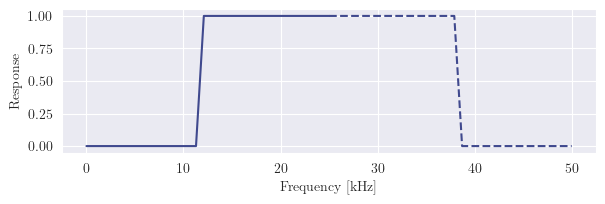

In [91]:
# Calculate pass band width, L
L = int(np.round(N * (0.5 * f_samp - f_p) / f_samp))
print("Bins in passband:", L)

# Construct V, with 1's in the pass band and 0's in the stop band
V = np.zeros(N//2)
V[-L:] = np.ones(L)
V = np.concatenate([V, [1], np.flip(V)])

# Construct a frequency axis for plotting
f = np.linspace(0, f_samp, N)

# Plot ideal frequency response, represented by vector V
fig, ax = plt.subplots(figsize=(6, 2))
fig.tight_layout()

palette = sns.color_palette()

sns.lineplot(x=f[:N//2+1], y=V[:N//2+1], ax=ax, c=palette[0], ls="-")
sns.lineplot(x=f[N//2:],   y=V[N//2:],  ax=ax, c=palette[0], ls="--")

ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel("Response")

fname = Path(A2_ROOT, "output", "q4_ideal_freqz.png")
fig.savefig(fname, **SAVEFIG_CONFIG)

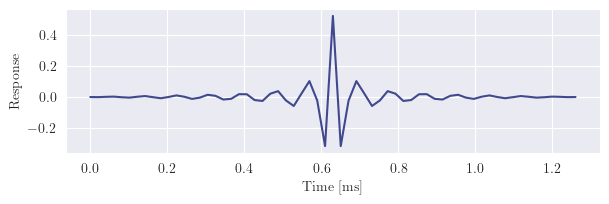

In [92]:
from scipy.fft import fft, fftshift, ifft

# Impulse (time) response of ideal filter
v = fftshift(ifft(V))

# Plot the ideal impulse response
fig, ax = plt.subplots(figsize=(6, 2))
fig.tight_layout()

t = np.linspace(0, N/f_samp, N)
sns.lineplot(x=t, y=v.real, ax=ax)

ax.set_xlabel("Time [ms]")
ax.set_ylabel("Response")

fname = Path(A2_ROOT, "output", "q4_ideal_impz.png")
fig.savefig(fname, **SAVEFIG_CONFIG)

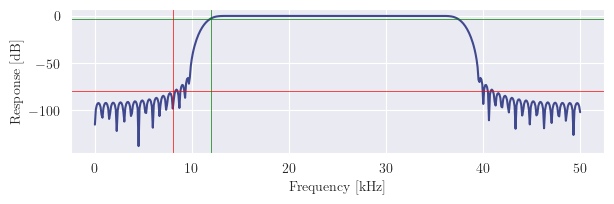

In [101]:
from scipy.signal.windows import kaiser

V_kaiser = np.round(np.abs(fft(v * kaiser(N, beta), 512)), decimals=10)

# Helper function for converting frequency response to dB scale
dB = lambda x: 20 * np.log10(x)

# Construct frequency axis for plotting
f = np.linspace(0, f_samp, 512)

# Plot the frequency response of the Kaiser-windowed filter
fig, ax = plt.subplots(figsize=(6, 2))
fig.tight_layout()

sns.lineplot(x=f, y=dB(V_kaiser), ax=ax)

# Stop band requirement
ax.axhline(-80, c="r", ls="-", lw=0.5)
ax.axvline(  8, c="r", ls="-", lw=0.5)

# Pass band requirement
ax.axhline(-3, c="g", ls="-", lw=0.5)
ax.axvline(12, c="g", ls="-", lw=0.5)

ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel("Response [dB]")

fname = Path(A2_ROOT, "output", "q4_kaiser_freqz.png")
fig.savefig(fname, **SAVEFIG_CONFIG)